# Optimization of Surface Position

Following we show a few examples on how to use the optimizer for the surface position in PVGIS.

<div class="grid cards" markdown>

- __Optimization of Surface Position__

    - Optimisation of Tilt, Orientation or both
    - Supported by optimizers implemented in SciPy

- __Multiple examples__

    - Examples for a single day, single and multi-year timestamps

</div>

## Programmatic preamble

In [1]:
from pvgisprototype import (
    TemperatureSeries,
    WindSpeedSeries,
    SpectralFactorSeries,
    LinkeTurbidityFactor,
    Longitude,
    Latitude,
    Elevation,
    SurfaceOrientation,
    SurfaceTilt,
)
from pvgisprototype.algorithms.huld.photovoltaic_module import PhotovoltaicModuleModel
from pvgisprototype.api.datetime.datetimeindex import generate_datetime_series
from zoneinfo import ZoneInfo
from pvgisprototype.api.surface.graph_power_output import graph_power_output
from pvgisprototype.api.surface.positioning import optimise_surface_position
from pvgisprototype.api.surface.parameter_models import (
    SurfacePositionOptimizerMethod,
    SurfacePositionOptimizerMode,
)
import math
from pvgisprototype.constants import DEGREES

## Data preparation

First, we define some basic parameters for a location, in which case it is a solar panel located behind the ESTI Lab, in the JRC, European Commission.

In [2]:
latitude = Latitude(value=45.812, unit=DEGREES)
longitude = Longitude(value=8.628, unit=DEGREES)
elevation = 214
timezone = ZoneInfo("UTC")

## Optimization of Position

### Optimal Tilt for a Single Day

For this first example, we will optimize the tilt of the panel on the 1st January 2010. We define the dates, the optimization mode as "Tilt", and the surface orientation of our panel

In [3]:
start_time = '2010-01-01'
end_time = '2010-01-02'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")
mode = SurfacePositionOptimizerMode.Tilt
surface_orientation = math.radians(180)

In [4]:
from numpy import full
photovoltaic_module = PhotovoltaicModuleModel.CIS_FREE_STANDING
spectral_factor_series = SpectralFactorSeries(value=full(len(timestamps), 1, dtype='float32'))
temperature_series = TemperatureSeries(value=full(len(timestamps), 12, dtype='float32'))
wind_speed_series = WindSpeedSeries(value=full(len(timestamps), 2, dtype='float32'))
linke_turbidity_factor_series = LinkeTurbidityFactor(value=full(len(timestamps), 1, dtype='float32'))

Now, we call the `optimise_surface_position()` function to calculate which is the optimal tilt for this case

In [5]:
result = optimise_surface_position(
    longitude=longitude.radians,
    latitude=latitude.radians,
    elevation=elevation, 
    timestamps=timestamps,
    timezone=timezone,
    spectral_factor_series=spectral_factor_series,
    photovoltaic_module=photovoltaic_module,
    temperature_series=temperature_series,
    wind_speed_series=wind_speed_series,
    linke_turbidity_factor_series=linke_turbidity_factor_series,
    mode=mode,
    surface_orientation=surface_orientation
)

In [6]:
from rich import print
print(result)

{
    'Surface Orientation': SurfaceOrientation(
        optimal=False,
        optimiser=None,
        min_degrees=0,
        min_radians=0,
        data_source=None,
        equation=None,
        algorithm=None,
        unit='radians',
        value=3.141592653589793,
        symbol='⯐ ⎄',
        description=None,
        label='Surface Position',
        title='Surface Position',
        supertitle='Surface Position data',
        shortname='Surface Position',
        name='Surface Position',
        max_radians=6.283185307179586,
        max_degrees=360
    ),
    'Surface Tilt': SurfaceTilt(
        optimal=True,
        optimiser=None,
        min_degrees=0,
        min_radians=0,
        data_source=None,
        equation=None,
        algorithm=None,
        unit='radians',
        value=1.3035176011540837,
        symbol='⯐ ⎄',
        description=None,
        label='Surface Position',
        title='Surface Position',
        supertitle='Surface Position data',
        shortname='Surface Position',
        name='Surface Position',
        max_radians=3.141592653589793,
        max_degrees=180
    ),
    'Mean PV Power': np.float32(232.95676),
    'Unit': 'radians',
    'Timing': 'Milne1921'
}

We can plot the photovoltaic power output against the surface tilt angle along with the point of maximum output

In [8]:
graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = SurfaceOrientation(value=(surface_orientation), unit='radians'),
                optimal_surface_tilt = result['Surface Tilt'].value,
                optimal_pv_power = result['Mean PV Power'] 
                )

IndexError: boolean index did not match indexed array along axis 0; size of axis is 0 but size of corresponding boolean axis is 25

### Optimal Tilt over a year 

In this example, we optimize the tilt of the panel for the year 2010, considering the same panel orientation as before. First we need to define the new timestamps.

In [77]:
start_time = '2010-01-01'
end_time = '2010-12-31'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")

We run the optimizer

In [78]:
result = optimize_angles(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = surface_orientation
                )
print(result)

NameError: name 'optimize_angles' is not defined

And now we plot the PV Power

In [79]:
graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = SurfaceOrientation(value=(surface_orientation), unit='radians'),
                optimal_surface_tilt = result['surface_tilt'].value,
                optimal_pv_power = result['mean_power_output'] 
                )

KeyError: 'surface_tilt'

### Optimal Tilt & Orientation angles over 15 years

In this last example, we will optimize the tilt and orientation of the panel from 2005 to 2010. Let's define the new timestamps, and change our mode to "Tilt and Orientation"

In [12]:
start_time = '2005-01-01'
end_time = '2020-01-01'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")
mode = SurfacePositionOptimizerMode.Tilt_and_Orientation

In [13]:
result = optimize_angles(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                )

print(result)

{'surface_orientation': SurfaceOrientation(value=3.141592653589793, unit='radians', min_radians=0, max_radians=6.283185307179586, min_degrees=0, max_degrees=360, optimal=True, optimizer='SHGO'), 'surface_tilt': SurfaceTilt(value=0.7853981633974483, unit='radians', min_radians=0, max_radians=1.5707963267948966, min_degrees=0, max_degrees=90, optimal=True, optimizer='SHGO'), 'mean_power_output': 263.25497}


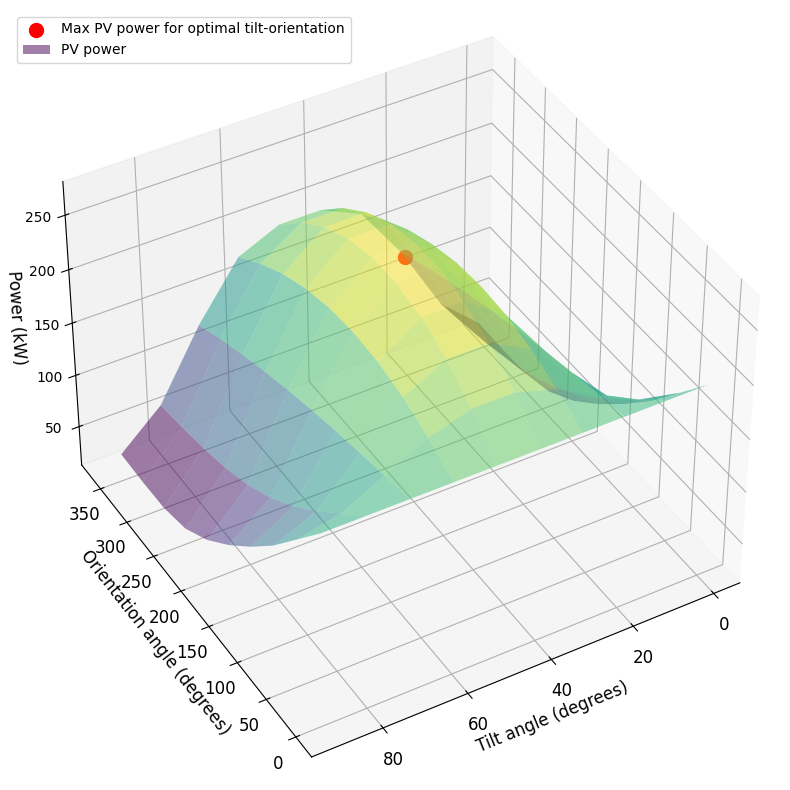

In [14]:
graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                optimal_surface_tilt = result['surface_tilt'].value,
                optimal_surface_orientation= result['surface_orientation'].value,
                optimal_pv_power = result['mean_power_output'] 
                )